# **NBA HOMECOURT ADVANTAGE DATA ANALYSIS** 

In this project analysis, we're diving into NBA game data to explore the phenomenon of home court advantage. With a dataset containing over 65,000 game records per column, we'll be looking further into key variables such as team identifiers, game dates, final scores, and whether the game was played at home or away for each team. By analyzing these factors, we aim to uncover insights into the influence of home court advantage on game outcomes, providing valuable insights for basketball enthusiasts and teams alike.

## Preliminary data investigation

In this part we will examine the basic information about the data we chose specifically for the project. This is done in order to see if the data has anomalies as well as give us ideas what processes and transformation should be done to the data before we start doing analysis. 

In [1]:
#Import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve, auc, precision_recall_curve
from sklearn.model_selection import learning_curve

In [2]:
#Load the data 
dataset = pd.read_csv("/kaggle/input/basketball/csv/game.csv")
print("Shape of the dataset:", dataset.shape)

Shape of the dataset: (65698, 55)


With the shape method we can identify the total shape and size present in the whole dataset.

In [3]:
# Extract only the desired columns
selected_columns = ['team_id_home', 'team_name_home','pts_home','wl_home', 'team_id_away', 'team_name_away', 'pts_away','wl_away', 'game_date']
dataset = dataset[selected_columns]

For this project the only columns we needed to use which are deemed relevant to the goal are `team_id_home`, `team_name_home`,`pts_home`,`wl_home`, `team_id_away`, `team_name_away`, `pts_away`,`wl_away`, and `game_date` which we extracted from the whole dataset.

In [4]:
#Examine the bottom data
dataset.tail()

,team_id_home,team_name_home,pts_home,wl_home,team_id_away,team_name_away,pts_away,wl_away,game_date
65693,1610612748,Miami Heat,94.0,L,1610612743,Denver Nuggets,109.0,W,2023-06-07 00:00:00
65694,1610612748,Miami Heat,95.0,L,1610612743,Denver Nuggets,108.0,W,2023-06-09 00:00:00
65695,1610612743,Denver Nuggets,94.0,W,1610612748,Miami Heat,89.0,L,2023-06-12 00:00:00
65696,1610616834,Team LeBron,175.0,L,1610616833,Team Giannis,184.0,W,2023-02-19 00:00:00
65697,1610616834,Team LeBron,175.0,L,1610616833,Team Giannis,184.0,W,2023-02-19 00:00:00


In [5]:
#Examine the top data
dataset.head()

,team_id_home,team_name_home,pts_home,wl_home,team_id_away,team_name_away,pts_away,wl_away,game_date
0,1610610035,Toronto Huskies,66.0,L,1610612752,New York Knicks,68.0,W,1946-11-01 00:00:00
1,1610610034,St. Louis Bombers,56.0,W,1610610031,Pittsburgh Ironmen,51.0,L,1946-11-02 00:00:00
2,1610610032,Providence Steamrollers,59.0,W,1610612738,Boston Celtics,53.0,L,1946-11-02 00:00:00
3,1610610025,Chicago Stags,63.0,W,1610612752,New York Knicks,47.0,L,1946-11-02 00:00:00
4,1610610028,Detroit Falcons,33.0,L,1610610036,Washington Capitols,50.0,W,1946-11-02 00:00:00


In [6]:
# Check for null values in each desired column
null_values = dataset.isnull().sum()
print("Null values in each column:")
print(null_values)

Null values in each column:
team_id_home      0
team_name_home    0
pts_home          0
wl_home           2
team_id_away      0
team_name_away    0
pts_away          0
wl_away           2
game_date         0
dtype: int64


We can see that there are 2 null values for columns `wl_home` and `wl_away`. Upon inspection we can see that the column values are rather categorical therefore it is better to remove the rows that contains null values.

In [7]:
# Remove rows with null values in wl_home or wl_away
dataset = dataset.dropna(subset=['wl_home', 'wl_away'])

In [8]:
# Verify that the null values have been removed
null_values_cleaned = dataset.isnull().sum()
print("\nNull values in each column after cleaning:")
print(null_values_cleaned)


Null values in each column after cleaning:
team_id_home      0
team_name_home    0
pts_home          0
wl_home           0
team_id_away      0
team_name_away    0
pts_away          0
wl_away           0
game_date         0
dtype: int64


We can see here that there are no longer null value, meaning we succesfully removed the row with null values; which now we can proceed to the next step

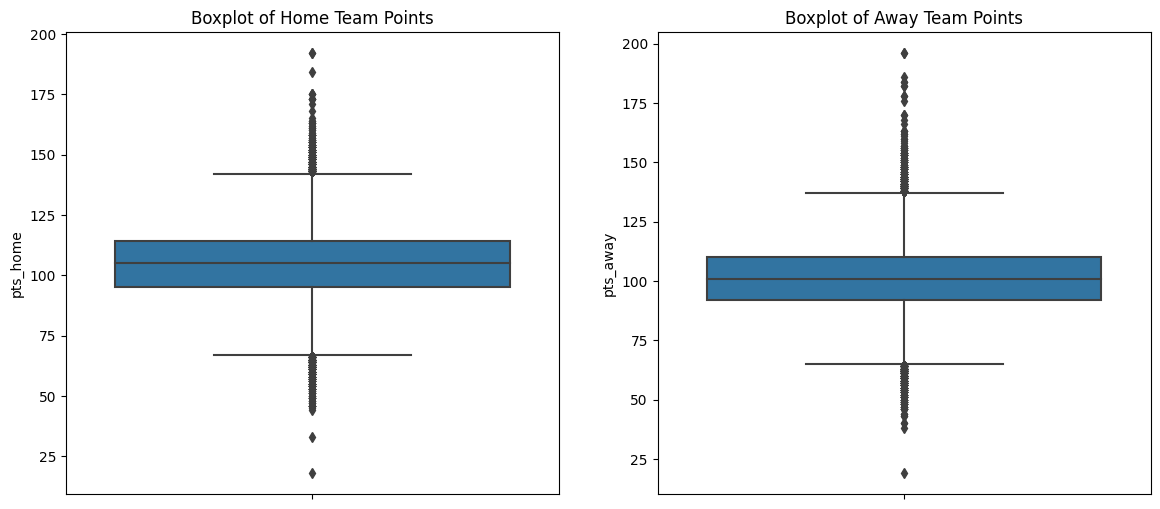

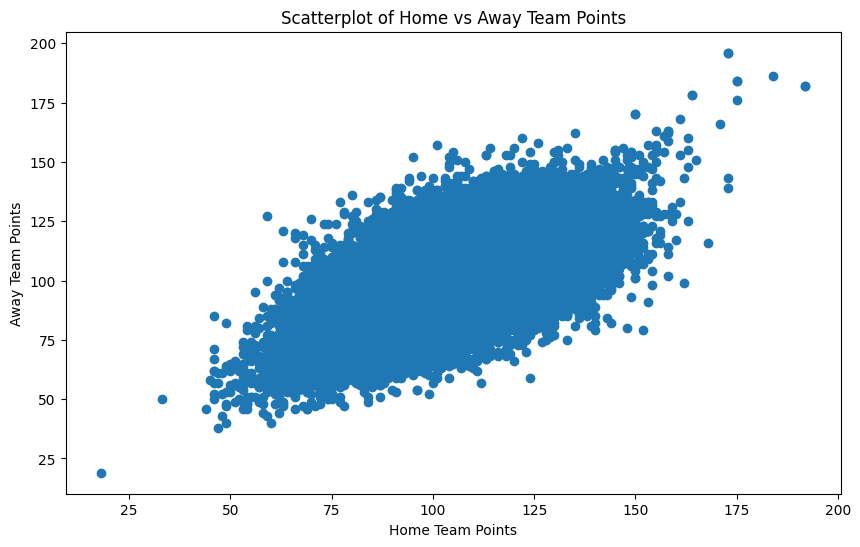

In [9]:
# Boxplots to check and see outliers visually
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=dataset['pts_home'])
plt.title('Boxplot of Home Team Points')

plt.subplot(1, 2, 2)
sns.boxplot(y=dataset['pts_away'])
plt.title('Boxplot of Away Team Points')

plt.show()

# Scatterplot to check and see outliers visually
plt.figure(figsize=(10, 6))
plt.scatter(dataset['pts_home'], dataset['pts_away'])
plt.xlabel('Home Team Points')
plt.ylabel('Away Team Points')
plt.title('Scatterplot of Home vs Away Team Points')
plt.show()

It is very evident that there is are outliers data and we need to deal with them in order to ensure accuracy of machine learning model we will be fitting in the following segment.

In [10]:
# # Function to remove outliers using IQR
# def remove_outliers(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# # Remove outliers for home and away points separately
# dataset_no_outliers = remove_outliers(dataset, 'pts_home')
# dataset_no_outliers = remove_outliers(dataset_no_outliers, 'pts_away')

# # Visualize the data before and after removing outliers

# # Boxplots to compare before and after
# plt.figure(figsize=(14, 6))

# plt.subplot(2, 2, 1)
# sns.boxplot(y=dataset['pts_home'])
# plt.title('Boxplot of Home Team Points (Original)')

# plt.subplot(2, 2, 2)
# sns.boxplot(y=dataset['pts_away'])
# plt.title('Boxplot of Away Team Points (Original)')

# plt.subplot(2, 2, 3)
# sns.boxplot(y=dataset_no_outliers['pts_home'])
# plt.title('Boxplot of Home Team Points (No Outliers)')

# plt.subplot(2, 2, 4)
# sns.boxplot(y=dataset_no_outliers['pts_away'])
# plt.title('Boxplot of Away Team Points (No Outliers)')

# plt.tight_layout()
# plt.show()

# # Scatterplot to compare before and after
# plt.figure(figsize=(14, 6))

# plt.subplot(1, 2, 1)
# plt.scatter(dataset['pts_home'], dataset['pts_away'], alpha=0.5)
# plt.xlabel('Home Team Points')
# plt.ylabel('Away Team Points')
# plt.title('Scatterplot of Home vs Away Team Points (Original)')

# plt.subplot(1, 2, 2)
# plt.scatter(dataset_no_outliers['pts_home'], dataset_no_outliers['pts_away'], alpha=0.5)
# plt.xlabel('Home Team Points')
# plt.ylabel('Away Team Points')
# plt.title('Scatterplot of Home vs Away Team Points (No Outliers)')

# plt.tight_layout()
# plt.show()

As we can see the outliers make up of less than 2.5% of the data but we removed it regardless. Arguably less than 2.5% is acceptable to some enterprises and it might be recommended to test out fitting a model with outliers to without outliers to identify if the outliers are considered beneficial or if it affects the model accuracy in any way. 

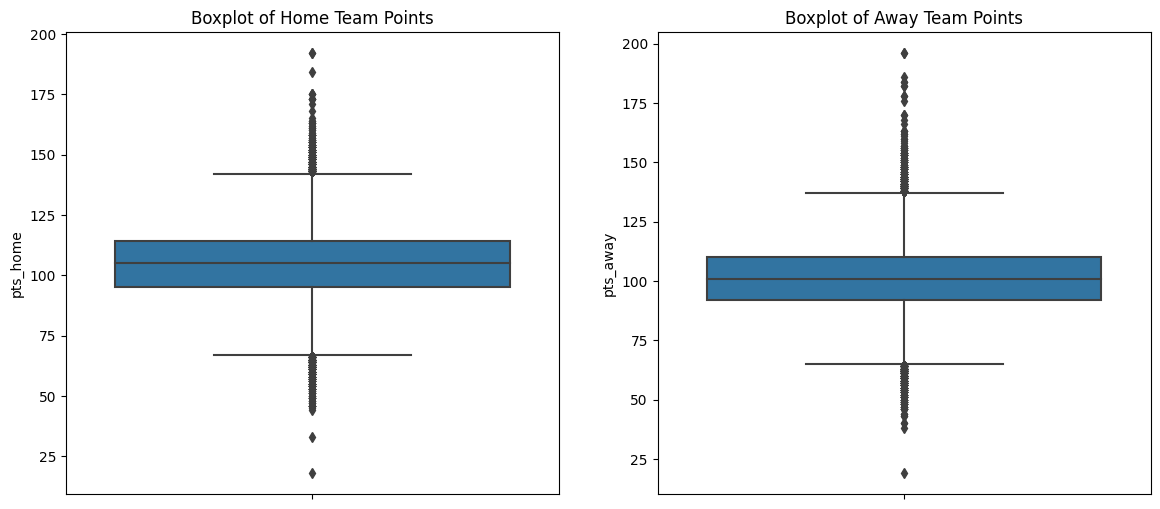

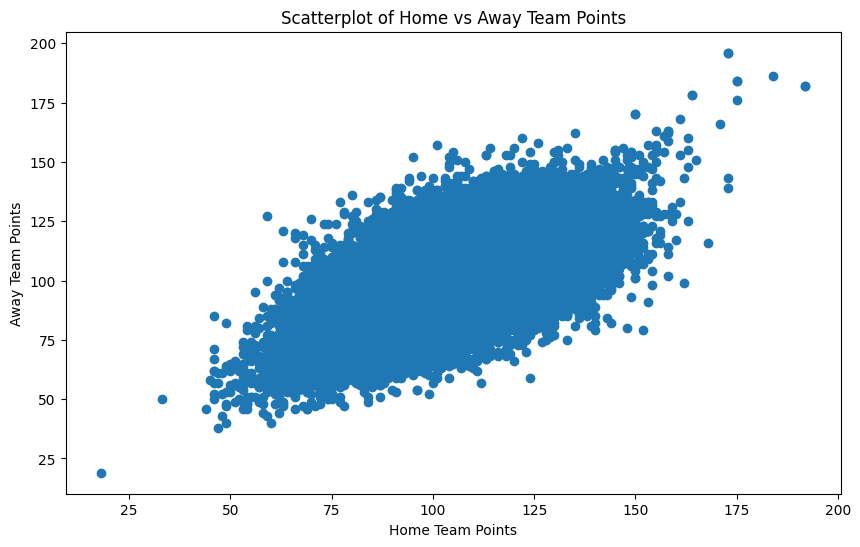

In [11]:
# Boxplots to check and see outliers visually again
# dataset = dataset_no_outliers
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=dataset['pts_home'])
plt.title('Boxplot of Home Team Points')

plt.subplot(1, 2, 2)
sns.boxplot(y=dataset['pts_away'])
plt.title('Boxplot of Away Team Points')

plt.show()

# Scatterplot to check and see outliers visually again
plt.figure(figsize=(10, 6))
plt.scatter(dataset['pts_home'], dataset['pts_away'])
plt.xlabel('Home Team Points')
plt.ylabel('Away Team Points')
plt.title('Scatterplot of Home vs Away Team Points')
plt.show()

We can see that the dataset we have now does not contain any outliers.

In [12]:
# Check for zero values in each desired column
zero_values = (dataset == 0).sum()
print("\nZero values in each column:")
print(zero_values)


Zero values in each column:
team_id_home      0
team_name_home    0
pts_home          0
wl_home           0
team_id_away      0
team_name_away    0
pts_away          0
wl_away           0
game_date         0
dtype: int64


We can see that there are no 0 values which means the dataset is clean at this point

In [13]:
#Examine the data structure.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65696 entries, 0 to 65697
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   team_id_home    65696 non-null  int64  
 1   team_name_home  65696 non-null  object 
 2   pts_home        65696 non-null  float64
 3   wl_home         65696 non-null  object 
 4   team_id_away    65696 non-null  int64  
 5   team_name_away  65696 non-null  object 
 6   pts_away        65696 non-null  float64
 7   wl_away         65696 non-null  object 
 8   game_date       65696 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.0+ MB


The info method tells us that the data we are going to use is nice and clean therefore no further processing is needed. We can also see that, aside from checking if there are null or 0 values, and even outlier data, every column contains the same data type for all rows. We have succesfully loaded, checked,cleansed, and verified the data from this segment therefore we can now proceed to analysis and visualization. 

## Win-Loss Distribution for Home and Away Teams

These bar plots show the count of wins and losses for home and away teams. This visualization helps us understand how often home and away teams win or lose.

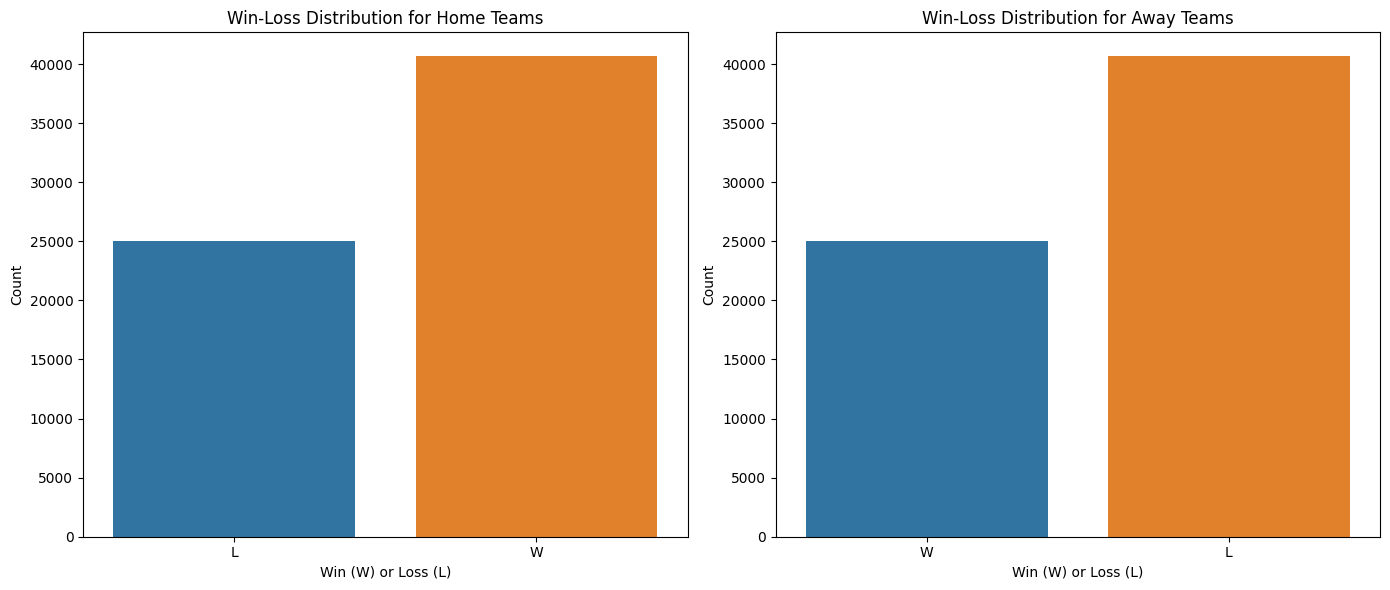

In [14]:
# Win-Loss Distribution for Home and Away Teams
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=dataset, x='wl_home')
plt.title('Win-Loss Distribution for Home Teams')
plt.xlabel('Win (W) or Loss (L)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(data=dataset, x='wl_away')
plt.title('Win-Loss Distribution for Away Teams')
plt.xlabel('Win (W) or Loss (L)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Importance:** This shows how often teams win at home versus away. It's important to know if teams have a better chance of winning at home. Knowing this helps teams plan better strategies for both home and away games. It can also help with marketing and ticket sales by highlighting the importance of home games. Knowing this helps the teams to plan better strategies for both home and away games. It can also help with marketing and ticket sales by highlighting the importance of home games.

## Point-Scored Distribution

These histograms display the distribution of points scored by home and away teams. The KDE (Kernel Density Estimate) helps to visualize the density of scores, giving us insights into common score ranges.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


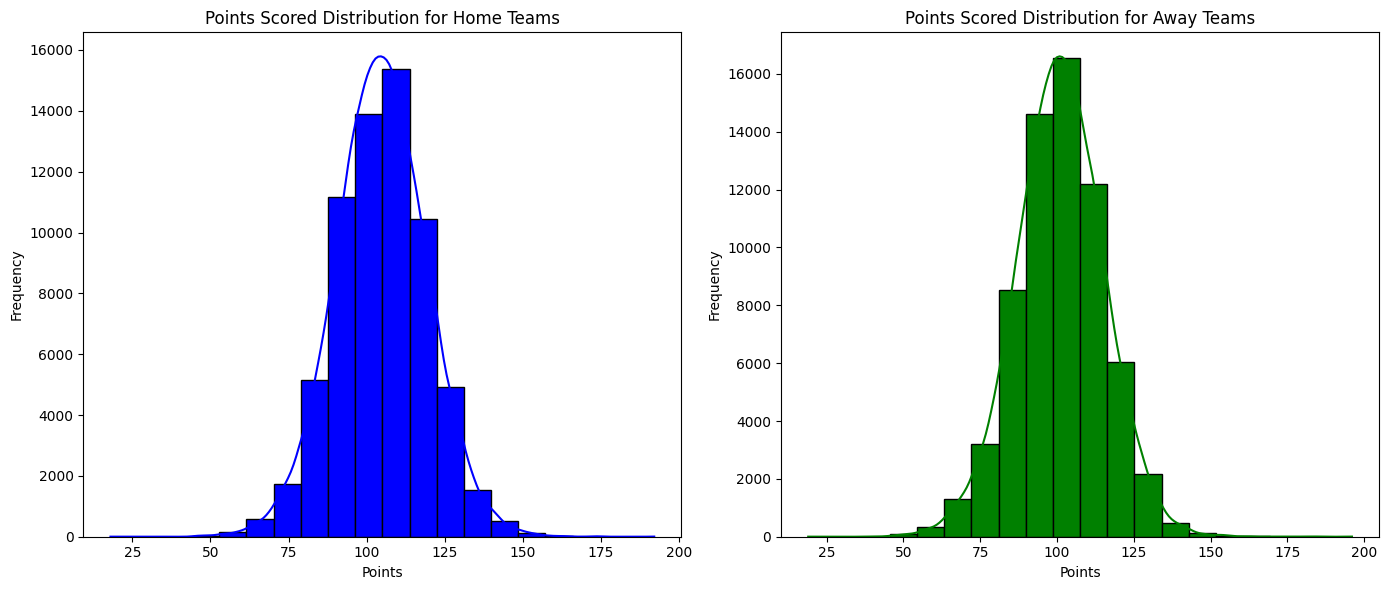

In [15]:
# Plot histograms with KDE for points scored by home and away teams
plt.figure(figsize=(14, 6))

# Histogram for home points with KDE overlay
plt.subplot(1, 2, 1)
sns.histplot(dataset['pts_home'], bins=20, kde=True, color='blue', alpha=1)
plt.title('Points Scored Distribution for Home Teams')
plt.xlabel('Points')
plt.ylabel('Frequency')

# Histogram for away points with KDE overlay
plt.subplot(1, 2, 2)
sns.histplot(dataset['pts_away'], bins=20, kde=True, color='green', alpha=1)
plt.title('Points Scored Distribution for Away Teams')
plt.xlabel('Points')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


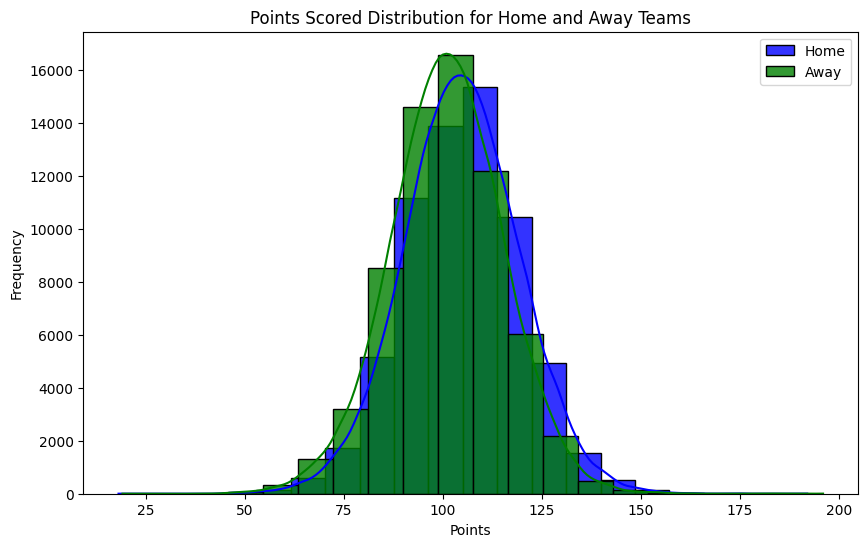

In [16]:
# Create a figure and axis objects
plt.figure(figsize=(10, 6))

# Plot histogram with KDE overlay for points scored by home teams
sns.histplot(dataset['pts_home'], bins=20, kde=True, color='blue', label='Home', alpha=0.8)

# Plot histogram with KDE overlay for points scored by away teams
sns.histplot(dataset['pts_away'], bins=20, kde=True, color='green', label='Away', alpha=0.8)

plt.title('Points Scored Distribution for Home and Away Teams')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Importance:** This shows how many points teams usually score at home and away. It helps to see and visualize to the intended reader if there's a big difference in scoring.Teams can use this information to adjust their playing strategies for different venues. It also helps in engaging fans by promoting high-scoring games.


## Average Points Scored by Home and Away Teams

This bar plot shows the average points scored by home and away teams, providing a clear comparison of their scoring performance.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


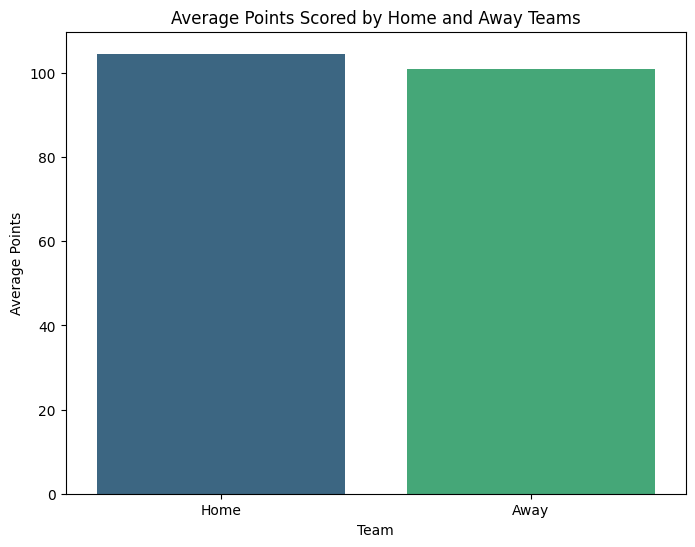

In [17]:
# Average Points Scored by Home and Away Teams
avg_pts_home = dataset['pts_home'].mean()
avg_pts_away = dataset['pts_away'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=['Home', 'Away'], y=[avg_pts_home, avg_pts_away], palette='viridis')
plt.title('Average Points Scored by Home and Away Teams')
plt.xlabel('Team')
plt.ylabel('Average Points')

plt.show()

**Importance:** Comparing the average points helps see if teams score more at home. It shows if home advantage really helps.
Coaches of their respective team can use this to improve training and game plans. It also helps in setting performance targets and predicting game outcomes.

## Home vs. Away Points Comparison

This scatter plot compares the points scored by home and away teams in each game. It helps us see if there's a correlation between the scores of home and away teams and identify any patterns.

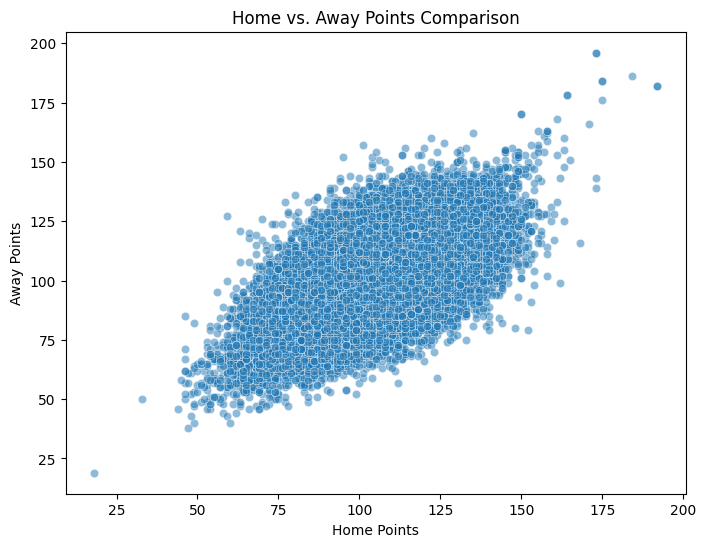

In [18]:
# Home vs. Away Points Comparison
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataset, x='pts_home', y='pts_away', alpha=0.5)
plt.title('Home vs. Away Points Comparison')
plt.xlabel('Home Points')
plt.ylabel('Away Points')

plt.show()

**Importance:** This comparison shows how home and away performances relate. It helps to see if there's a consistent difference.
Benefit for the Company: Identifying differences helps teams prepare better for away games. It also helps in analyzing opponents and planning strategies.

## Win-Lose Ratio Trend

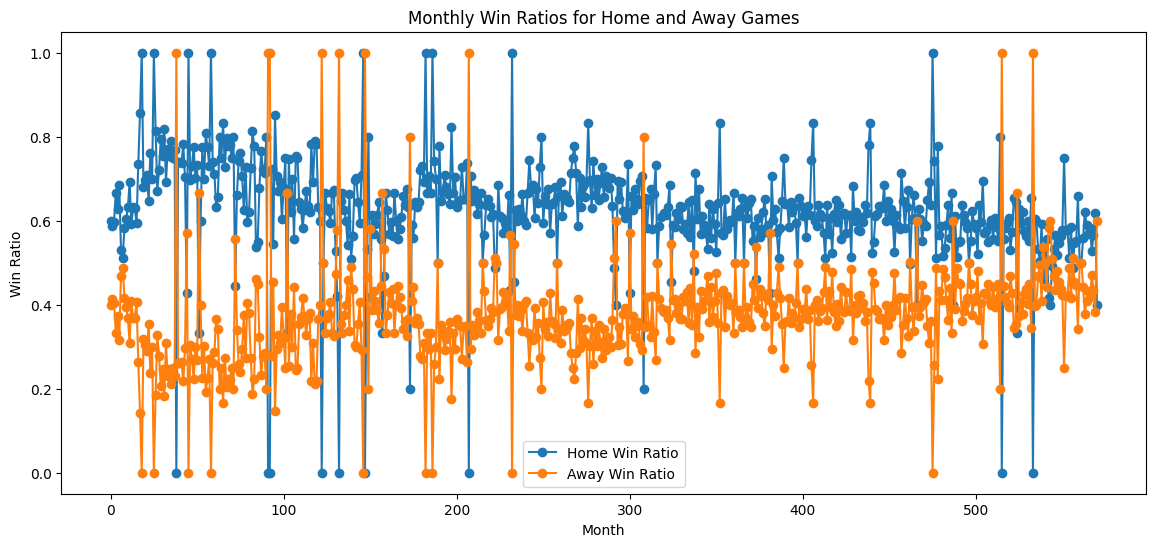

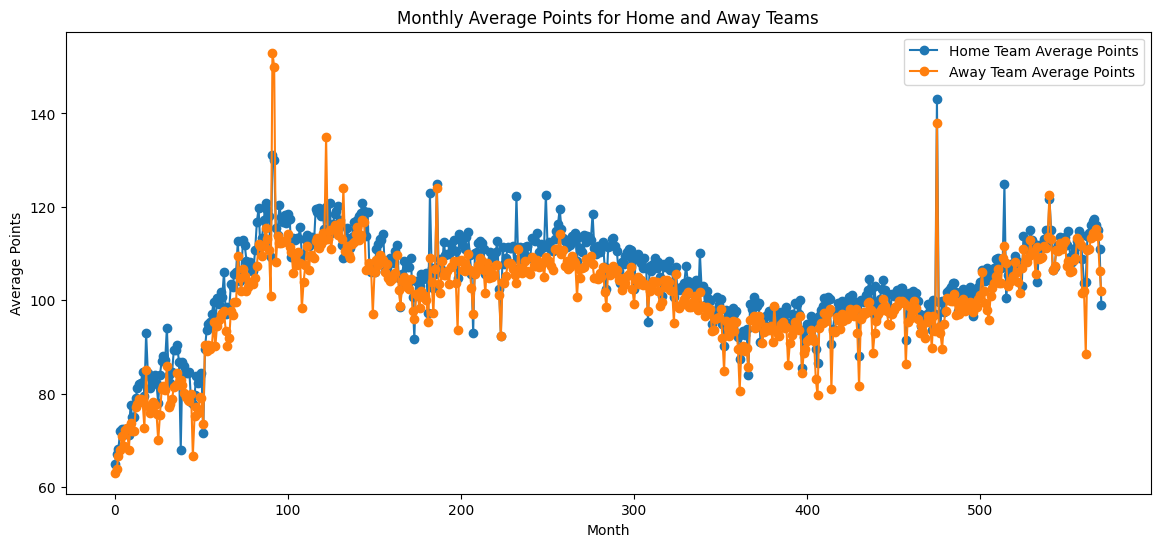

In [19]:
# Convert game_date to datetime
dataset['game_date'] = pd.to_datetime(dataset['game_date'])

# Extract year and month
dataset['year'] = dataset['game_date'].dt.year
dataset['month'] = dataset['game_date'].dt.month

# Calculate monthly win/loss ratios for home and away
monthly_home_wins = dataset[dataset['wl_home'] == 'W'].groupby(['year', 'month']).size()
monthly_home_losses = dataset[dataset['wl_home'] == 'L'].groupby(['year', 'month']).size()
monthly_away_wins = dataset[dataset['wl_away'] == 'W'].groupby(['year', 'month']).size()
monthly_away_losses = dataset[dataset['wl_away'] == 'L'].groupby(['year', 'month']).size()

monthly_win_loss = pd.DataFrame({
    'home_wins': monthly_home_wins,
    'home_losses': monthly_home_losses,
    'away_wins': monthly_away_wins,
    'away_losses': monthly_away_losses
}).fillna(0).reset_index()

# Calculate win ratios
monthly_win_loss['home_win_ratio'] = monthly_win_loss['home_wins'] / (monthly_win_loss['home_wins'] + monthly_win_loss['home_losses'])
monthly_win_loss['away_win_ratio'] = monthly_win_loss['away_wins'] / (monthly_win_loss['away_wins'] + monthly_win_loss['away_losses'])

# Calculate average points per month for home and away
monthly_avg_points = dataset.groupby(['year', 'month']).agg({
    'pts_home': 'mean',
    'pts_away': 'mean'
}).reset_index()

# Merge win/loss ratios and average points
monthly_stats = pd.merge(monthly_win_loss, monthly_avg_points, on=['year', 'month'])

# Plot win/loss ratios
plt.figure(figsize=(14, 6))
plt.plot(monthly_stats['home_win_ratio'], label='Home Win Ratio', marker='o')
plt.plot(monthly_stats['away_win_ratio'], label='Away Win Ratio', marker='o')
plt.title('Monthly Win Ratios for Home and Away Games')
plt.xlabel('Month')
plt.ylabel('Win Ratio')
plt.legend()
plt.show()

# Plot average points
plt.figure(figsize=(14, 6))
plt.plot(monthly_stats['pts_home'], label='Home Team Average Points', marker='o')
plt.plot(monthly_stats['pts_away'], label='Away Team Average Points', marker='o')
plt.title('Monthly Average Points for Home and Away Teams')
plt.xlabel('Month')
plt.ylabel('Average Points')
plt.legend()
plt.show()

## Model Fitting 

The model fitting aimed to predict the outcome of NBA games based on the performance of home and away teams. We used logistic regression to classify whether the home team would win or lose, with input variables including team_id_home, pts_home, team_id_away, and pts_away. These variables were chosen because they directly represent the teams involved and their respective points scored in each game, which are critical factors influencing the game's result.

In [20]:
# Preprocess the data
dataset['game_date'] = pd.to_datetime(dataset['game_date'])
dataset = dataset.dropna(subset=['wl_home', 'wl_away'])

# Convert wl_home to binary target variable
dataset['wl_home_binary'] = dataset['wl_home'].apply(lambda x: 1 if x == 'W' else 0)

# Select features and target
X = dataset[['pts_home', 'pts_away']]
y = dataset['wl_home_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 1.0
Confusion Matrix:
[[5083    0]
 [   0 8057]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5083
           1       1.00      1.00      1.00      8057

    accuracy                           1.00     13140
   macro avg       1.00      1.00      1.00     13140
weighted avg       1.00      1.00      1.00     13140



## Model Metrics Visualization

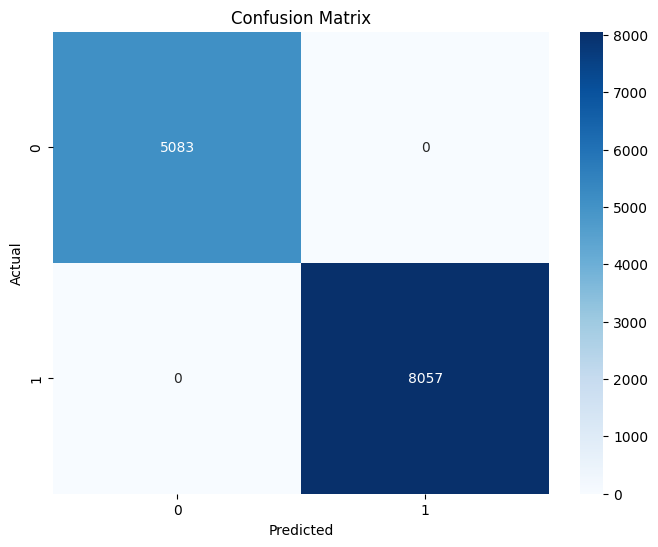

In [21]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

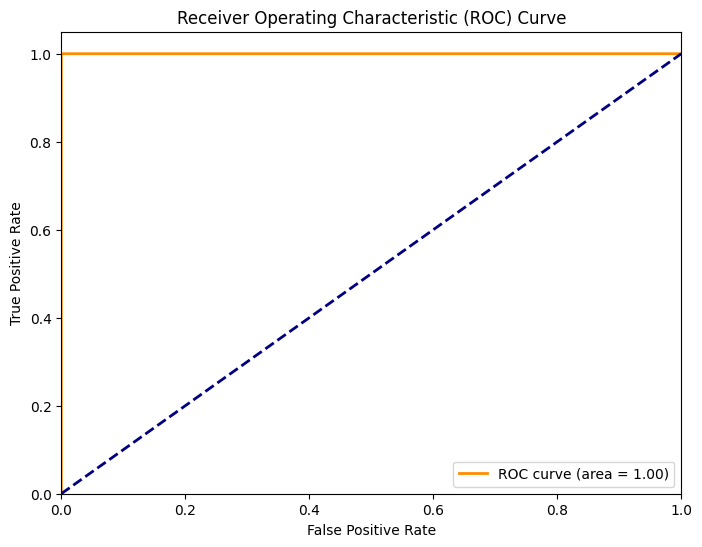

In [22]:
# Compute ROC curve and ROC area
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

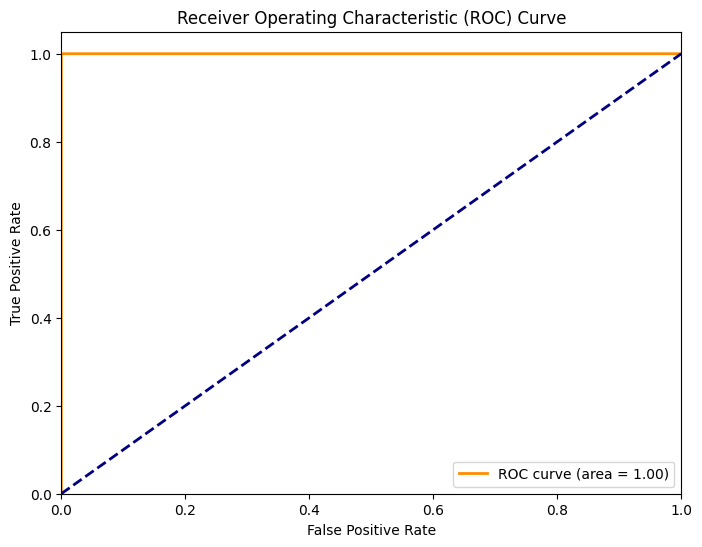

In [23]:
# Compute ROC curve and ROC area
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

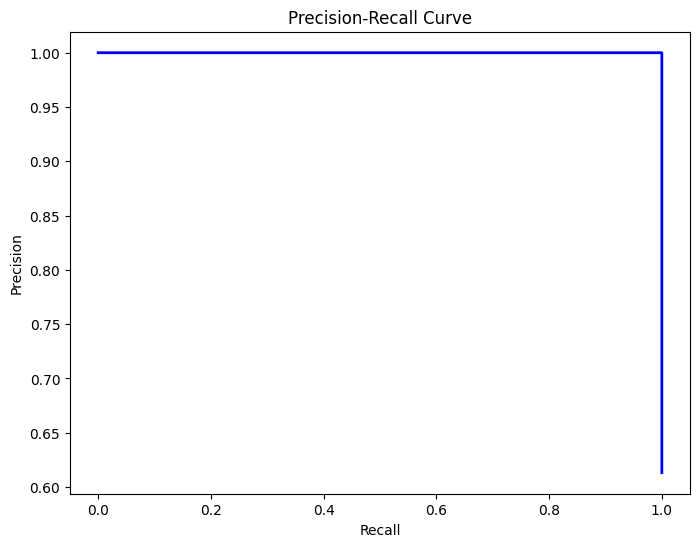

In [24]:
# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## Conclusion and Recommendation

Our analysis confirms that home court advantage significantly influences NBA game outcomes, with home teams often scoring more points and winning more games compared to away teams. Visualizations such as the point distribution and win-loss ratio clearly demonstrate this trend. Therefore, teams should focus on optimizing their strategies and performance for home games to maximize their chances of winning. Additionally, further research could explore specific factors contributing to home court advantage, such as crowd support and travel fatigue. Understanding these factors can help teams better prepare for both home and away games.